# Final Prediction

In [1]:
import joblib as jb
model=jb.load('files/train/model/lor.pkl')
encode=jb.load('files/train/model/train_encode_model.pkl')

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [3]:
def flow(x_path,y_path):
    
    #Read
    x_test=pd.read_csv(x_path)
    y_test=pd.read_csv(y_path)
    
    #encoding
    x_test_reshape=np.array(x_test).reshape(-1, 1)
    x_encode=encode.transform(x_test_reshape)
    x_test_encode=pd.DataFrame(x_encode,columns=['v2'])
    y_test_encode=y_test.replace({'ham':1,'spam':0})
    
    #prediction
    y_pred=pd.DataFrame(model.predict(x_test_encode))
    
    #Metrics
    report=classification_report(y_pred,y_test_encode)
    cm=confusion_matrix(y_pred,y_test_encode)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm)
    
    return y_pred,report,cm,disp

In [4]:
y_pred,report,cm,disp=flow('test data/x.csv','test data/y.csv')

In [5]:
y_pred

,0
0,1
1,1
2,1
3,1
4,1
...,...
1667,1
1668,1
1669,1
1670,1


In [6]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.87      0.93      1672

    accuracy                           0.87      1672
   macro avg       0.50      0.43      0.47      1672
weighted avg       1.00      0.87      0.93      1672



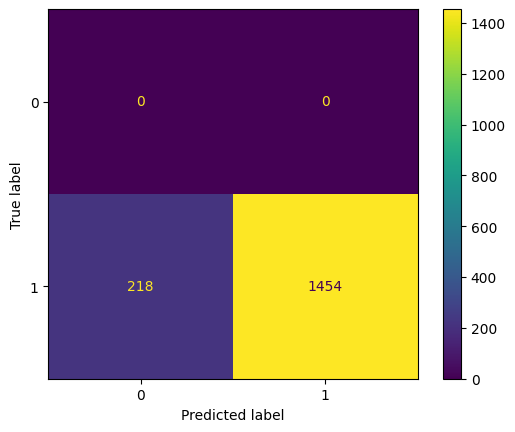

In [7]:
disp.plot()